In [240]:
import pandas as pd
import os
import json
import re
import plotly.express as px
import plotly.graph_objs as go
import plotly.graph_objects as go


In [113]:
# pre processing  
def treat_finalprice(x):
    x = x.replace("," , ".")
    float_regex = "[-+]?[0-9]*\.?[0-9]*"
    match = re.findall(float_regex, x)
    if match[0] != "":
        x = float(match[0])
    return x

def treating_prices(df):
    df['finalprice'] = df['finalprice'].apply(lambda x: treat_finalprice(x))
    df['originprice'] = df['originprice'].apply(lambda x: treat_finalprice(x))
    return df

def get_dataframe(path):
    df = pd.read_csv('C:/Users/hp/Downloads/all_data_result_final.csv')
    df = df[['product', 'picture','sexe','mark', 'description','finalprice', 'originprice', 'promo',]]
    df = treating_prices(df)
    return df

In [114]:
path = "all_data_result_final.csv"
df = pd.read_csv(path)
df = df[['product', 'picture','sexe','mark', 'description','finalprice', 'originprice', 'promo',]]

In [157]:
# Start managing our Data
def select_products(df,product,sexe, mark): 
    if product == "all" and sexe == "all" and mark == "all":
        df_res = df
    elif product == "all":
        df_res = df[(df['sexe'] == sexe) & (df['mark'] == mark) ]
    elif sexe == "all":
        df_res = df[(df['product'] == product) & (df['mark'] == mark) ]
    elif mark == "all":
        df_res = df[(df['product'] == product) & (df['sexe'] == sexe) ]
        
    elif product == "all" and sexe == "all":
        df_res = df[(df['mark'] == mark) ]
    elif product == "all" and mark == "all":
        df_res = df[(df['sexe'] == sexe) ]
        
    elif sexe == "all" and mark == "all":
        df_res = df[(df['product'] == product) ]
    else :
        df_res = df[ (df['product'] == product) & (df['sexe'] == sexe) & (df['mark'] == mark) ]
        
    return df_res




In [245]:
def get_Brands(selected_df,selected_rang):
    marks_cout = selected_df.groupby(["mark"]).mean()
    q_mean = marks_cout.quantile(
        q = selected_rang,                      # The percentile to calculate
        axis=0,                     # The axis to calculate the percentile on
        numeric_only=True,          # To calculate only for numeric columns
        interpolation='linear'      # The type of interpolation to use when the quantile is between 2 values
                                )

    df_res = marks_cout[marks_cout.finalprice <= q_mean.finalprice]
    df_res = df_res.sort_values(by=['finalprice',"originprice","promo"], ascending = False).head(5)
    df_res.reset_index(inplace=True)
    return df_res


def get_best_Brands_fig(selected_df,selected_rang):
    df_res = get_Brands(selected_df, selected_rang)
    fig = px.histogram(
                        df_res,
                        x="mark",
                         y="promo",
                         color ="mark",
                         template='plotly_dark',
                         title="Best brands based on linear function(final price , origin price, promo ) ",
                         labels={'mark':'Brand',"y": "origin price"}, 
                         height=600
                      )
    return fig




def get_comparaison_fig(selected_df,selected_rang):
    df_res = get_Brands(selected_df, selected_rang)
    fig = go.Figure()
    fig.add_trace(go.Bar(
        x= df_res["mark"],
        y=df_res["originprice"],
        name='origin price',
        marker_color='green'
    ))
    fig.add_trace(go.Bar(
        x= df_res["mark"],
        y=df_res["finalprice"],
        name='final price',
        marker_color='red'
    ))

    # Here we modify the tickangle of the xaxis, resulting in rotated labels.
    fig.update_layout(
        barmode='group', 
         template='plotly_dark',
         title="Best brands prices comparaison based on linear function(final price , origin price, promo ) ",
         height=600    
    )
    return fig



In [273]:
# FONCTION 1
# https://dash.plotly.com/dash-core-components/slider
selected_df = select_products(df,"short","homme", "all")
selected_rang = 0.9

fig1 = get_best_Brands_fig(selected_df,selected_rang)
fig2 = get_comparaison_fig(selected_df,selected_rang)
# fig1.show()
# fig2.show()


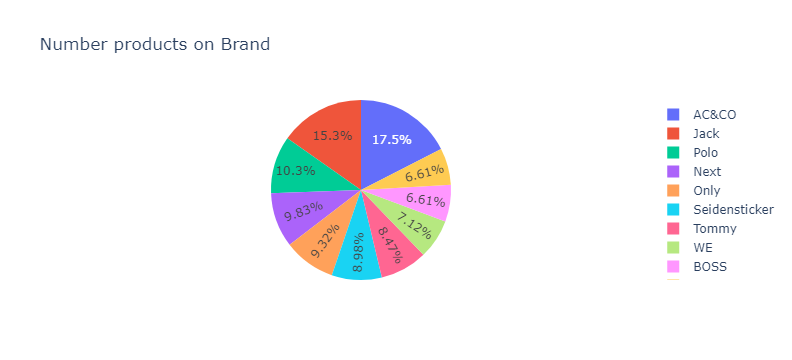

In [325]:
# FONCTION 2

def get_number_products_df (selected_df):
    marks_count = selected_df.groupby(["mark"]).count()
    marks_count.reset_index(inplace=True)
    marks_count["number_products"] =  marks_count["product"]
    marks_count = marks_count.sort_values(by='number_products', ascending = False)
    marks_count.reset_index(inplace=True)
    marks_count = marks_count[["mark","number_products"]]
    return marks_count
def get_number_products_fig (selected_df):
    marks_count = get_number_products_df (selected_df)
    fig = px.pie(marks_count.head(10), values='number_products', names='mark', title='Number products on Brand ')
    return fig
    
selected_df = select_products(df,"chemise","homme", "all")
get_number_products_fig (selected_df)

In [303]:

def get_df_trendbrand(trend_brands,df,product,sexe):
    df_res = pd.DataFrame()
    for brand in trend_brands :
            selected_df = select_products(df,product,sexe,brand )
            df_res = pd.concat([df_res,selected_df])
    return df_res


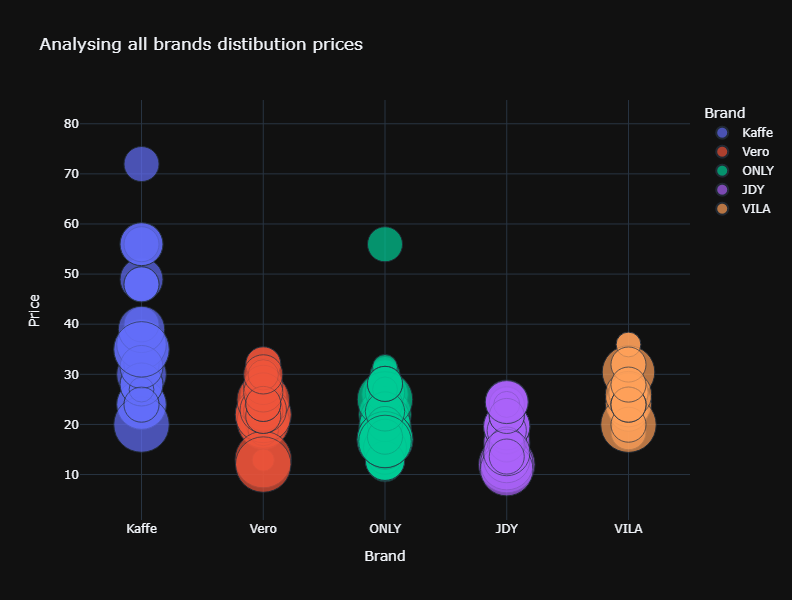

In [345]:
# function 3
def get_fig_analyse_brands(df, product,sexe):
    selected_df = select_products(df,product,sexe, "all")
    trend_brands = get_number_products_df(selected_df).head(5)["mark"].tolist()
    final_sel_df = get_df_trendbrand(trend_brands,df,product,sexe)
    fig1 = px.scatter(final_sel_df, 
                     x="mark",
                     y="finalprice",
                     size="promo", 
                     color="mark",
                     log_x=False, 
                     size_max=40,
                     template='plotly_dark',
                     title="Analysing all brands distibution prices",
                     labels={"finalprice": "Price",'mark':'Brand'}, 
                     height=600,

                    )
    return fig1

get_fig_analyse_brands(df, "chemise","femme")
